In [39]:
import pandas as pd
import re
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [4]:
input_df = pd.read_csv("cord19_df.csv")

In [5]:
# keywords were obtained via a continuously updated report from the National University of Singapore
# (https://sph.nus.edu.sg/covid-19/research/)

keywords = [
    'remdesivir',
    'azithromycin',
    'ciprofloxacin',
    'lopinavir',
    'ritonavir',
    'interferon',
    'chloroquine',
    'hydroxychloroquine',
    'darunavir',
    'cobicistat',
    'emtricitabine',
    'nelfinavir',
    'tenofovir',
    'saquinavir',
    'azuvudine',
    'favipiravir',
    'umifenovir',
    'oseltamivir',
    'baloxavir',
    'methylprednisolone',
    'ribvarin',
    'sofosbuvir',
    'beclabuvir',
    'galidesivir',
    'simeprevir',
    'nitazoxanide',
    'niclosamide',
    'naproxen',
    'clarithromycin',
    'minocyclinethat',
    'human monoclonal antibody',
    'tocilizumab',
    'sarilumab',
    'leronlimab',
    'foralumab',
    'camrelizumab',
    'ifx-1',
    'ifx',
    'arbidol',
    'fingolimod',
    'brilacidin',
    'sirolimus',
    'danoprevir',
    'rintatolimod',
    'cynk-001',
    'cynk',
    'tmprss2',
    'jak',
    'zinc',
    'quercetin',
    'convalescent plasma',
    'nanoviricide',
    'corticosteroids',
    'bevacizumab',
    'bxt-25',
    'bxt',
    'angiotension',
    'rhace2',
    'pirfenidone',
    'thalidomide',
    'brohexine hydrochloride',
    'dehydroandrographolide succinate',
    'antibody dependent enhancement',
    'antibody-dependent enhancement',
    ' ade ',
    'prophylaxis',
    'prophylactic',
    'vaccine',
    'assay',
    'elisa',
    'th1',
    'th2',
    'elispot',
    'cytometry',
    'ctc'
]

In [21]:
# This function takes in a piece of text and extracts out the pre-specified keywords found in the text.
def get_keywords(row):
    found_keywords = []
        
    # Looping through each row and column of the data
    for col in row.iteritems():
        # Checking if the column is the title or abstract
        if ("title" in col[0]) | ("abstract" in col[0]):
            text = col[1].lower() # lowercass
            text = " ".join(text.split()) # removes useless whitespace
            
            # Loops through the known keywords and detects if it is found in the text
            for keyword in keywords:
                if keyword in text:
                    found_keywords.append(keyword)
            
    # De-duplicates the keywords found
    found_keywords = set(found_keywords)
    
    # If no keywords found, return NA
    if len(found_keywords) == 0:
        row['keywords'] = 'NA'
    else:
        row['keywords'] = "; ".join(found_keywords)
        
    return row

In [20]:
print(input_df.shape)

# Filter out non-covid papers
filtered_df = input_df[input_df['is_covid19']]
print(filtered_df.shape)

# Filter out papers from before 2019
filtered_df = filtered_df[filtered_df.publish_year>=2019]
print(filtered_df.shape)

# Filter out papers with no title/abstract/body
filtered_df = filtered_df[filtered_df['title'].str.len() > 0]
filtered_df = filtered_df[filtered_df['abstract'].str.len() > 0]
filtered_df = filtered_df[filtered_df['body_text'].str.len() > 0]
print(filtered_df.shape)

# Filter for titles and abstracts that have mention of one of the keywords
keyword_query = "|".join(keywords)
filtered_df = filtered_df[filtered_df['title'].str.contains(keyword_query, flags=re.IGNORECASE, regex=True) | 
                    filtered_df['abstract'].str.contains(keyword_query, flags=re.IGNORECASE, regex=True)]
print(filtered_df.shape)



(134946, 17)
(35496, 17)
(34881, 17)
(11731, 17)
(2013, 17)


In [22]:
filtered_df = filtered_df.apply(get_keywords, axis=1)
print("Filter for terms relating to treatments")
print(filtered_df.shape)

Filter for terms relating to treatments
(2013, 18)


In [24]:
filtered_df.keywords

57                                                  vaccine
134       hydroxychloroquine; azithromycin; lopinavir; r...
137                                                 vaccine
266                                                 vaccine
340                                              interferon
                                ...                        
134282                                          tocilizumab
134424                                              vaccine
134441                                              vaccine
134469    vaccine; tmprss2; remdesivir; chloroquine; fav...
134571                             oseltamivir; prophylaxis
Name: keywords, Length: 2013, dtype: object

In [55]:
frequency = defaultdict(int)
supressed_terms = ['vaccine', 'assay']

for row in filtered_df.keywords:
    for word in row.split('; '):
        if word not in supressed_terms:
            frequency[word] += 1

In [56]:
c = Counter(frequency)
c.most_common(15)

[('chloroquine', 310),
 ('hydroxychloroquine', 247),
 ('lopinavir', 133),
 ('ritonavir', 122),
 ('remdesivir', 120),
 ('interferon', 118),
 ('prophylactic', 92),
 ('prophylaxis', 88),
 ('tmprss2', 84),
 ('azithromycin', 79),
 ('tocilizumab', 66),
 ('elisa', 64),
 ('corticosteroids', 59),
 ('convalescent plasma', 51),
 ('favipiravir', 35)]

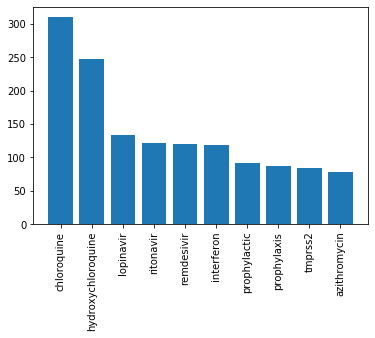

In [57]:
labels, values = zip(*c.most_common(10))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.show()